In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
cleaned_data = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")


In [3]:
cleaned_data


,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.15,17196,200.75
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,4.69,2.99,0.61,0.00,91.67,0.03,278,3.14,24130,272.61
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,42.45,11.93,0.98,0.00,44.29,0.34,130,3.06,4235,99.80
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,38.17,19.04,1.60,0.50,38.03,2.65,89,1.68,11074,209.11
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,1.55,2.46,0.89,0.00,94.89,0.21,182,2.86,14030,220.32
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,22.04,50.95,6.94,0.70,13.02,6.36,28,0.83,5623,165.69
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,28.35,2.37,0.92,0.03,68.33,0.00,164,2.87,14299,250.61
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,6.16,9.35,1.66,0.00,82.81,0.01,128,3.03,10108,238.98
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,17.61,19.88,28.47,0.32,32.51,1.21,191,3.74,8984,176.10
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,18.46,46.88,10.73,0.57,16.94,6.42,66,1.60,6197,150.42


In [17]:
zip_area = pd.read_csv("Chicago_area_by_zipcode.csv")

In [21]:
zip_area = zip_area.iloc[: , :-2]

zip_area

,zipcode,area
0,60007,14
1,60018,16
2,60068,7
3,60106,9
4,60131,6
...,...,...
62,60706,3
63,60707,4
64,60714,6
65,60804,8


In [22]:
merged_data = pd.merge(cleaned_data, zip_area, how='left', left_on='Zipcode', right_on='zipcode')

In [46]:
merged_data = merged_data.drop('zipcode', axis=1)

In [47]:
merged_data['area'] = merged_data['area'].replace(0,1)

In [48]:
merged_data

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),area,population_density
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,1.67,0.68,66.31,2.47,184,2.15,17196,200.75,4,21414.5
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,0.61,0.00,91.67,0.03,278,3.14,24130,272.61,5,17703.0
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,0.98,0.00,44.29,0.34,130,3.06,4235,99.80,4,10608.5
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,1.60,0.50,38.03,2.65,89,1.68,11074,209.11,2,26478.5
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,0.89,0.00,94.89,0.21,182,2.86,14030,220.32,3,21226.3
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,6.94,0.70,13.02,6.36,28,0.83,5623,165.69,1,33937.0
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,0.92,0.03,68.33,0.00,164,2.87,14299,250.61,11,5187.0
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,1.66,0.00,82.81,0.01,128,3.03,10108,238.98,5,8459.2
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,28.47,0.32,32.51,1.21,191,3.74,8984,176.10,2,25508.5
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,10.73,0.57,16.94,6.42,66,1.60,6197,150.42,2,20599.0


In [49]:
merged_data['population_density'] = merged_data.apply (lambda row: (row['Population']/row['area']), axis=1)

In [50]:
merged_data

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),area,population_density
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,1.67,0.68,66.31,2.47,184,2.15,17196,200.75,4,21414.500000
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,0.61,0.00,91.67,0.03,278,3.14,24130,272.61,5,17703.000000
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,0.98,0.00,44.29,0.34,130,3.06,4235,99.80,4,10608.500000
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,1.60,0.50,38.03,2.65,89,1.68,11074,209.11,2,26478.500000
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,0.89,0.00,94.89,0.21,182,2.86,14030,220.32,3,21226.333333
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,6.94,0.70,13.02,6.36,28,0.83,5623,165.69,1,33937.000000
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,0.92,0.03,68.33,0.00,164,2.87,14299,250.61,11,5187.000000
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,1.66,0.00,82.81,0.01,128,3.03,10108,238.98,5,8459.200000
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,28.47,0.32,32.51,1.21,191,3.74,8984,176.10,2,25508.500000
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,10.73,0.57,16.94,6.42,66,1.60,6197,150.42,2,20599.000000


In [51]:
merged_data['population_density'] = merged_data['population_density'].round(1)

In [52]:
merged_data.to_csv('Chicago-Covid-SocioDemographics-Pop_density.csv', index=False)

In [53]:
merged_data

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),area,population_density
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,1.67,0.68,66.31,2.47,184,2.15,17196,200.75,4,21414.5
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,0.61,0.00,91.67,0.03,278,3.14,24130,272.61,5,17703.0
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,0.98,0.00,44.29,0.34,130,3.06,4235,99.80,4,10608.5
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,1.60,0.50,38.03,2.65,89,1.68,11074,209.11,2,26478.5
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,0.89,0.00,94.89,0.21,182,2.86,14030,220.32,3,21226.3
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,6.94,0.70,13.02,6.36,28,0.83,5623,165.69,1,33937.0
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,0.92,0.03,68.33,0.00,164,2.87,14299,250.61,11,5187.0
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,1.66,0.00,82.81,0.01,128,3.03,10108,238.98,5,8459.2
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,28.47,0.32,32.51,1.21,191,3.74,8984,176.10,2,25508.5
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,10.73,0.57,16.94,6.42,66,1.60,6197,150.42,2,20599.0


In [54]:
merged_data.columns

Index(['Zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin Ame

<AxesSubplot:xlabel='Death Counts', ylabel='population_density'>

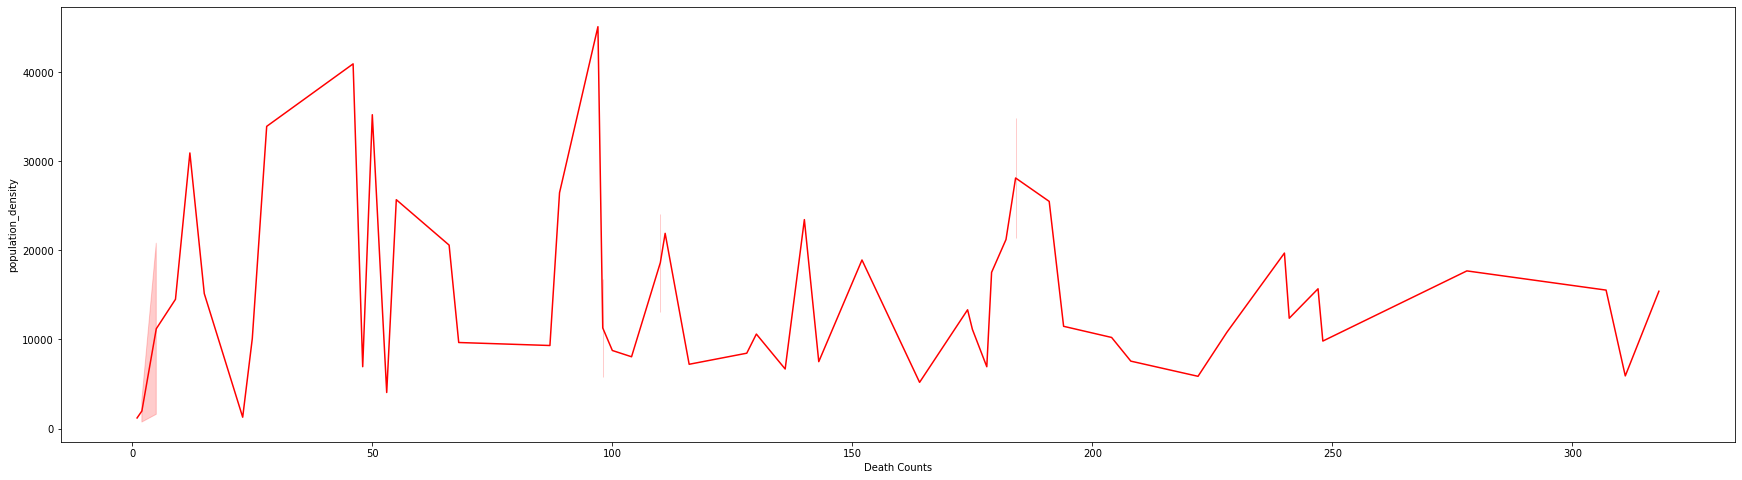

In [63]:
plt.figure(figsize=(30,8))
sns.lineplot(data=merged_data, y="population_density", x="Death Counts", color='r')